# Smoking is bad

In [50]:
# TODO: install all the necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from pathlib import Path
import numpy as np


In [58]:
# TODO: load the data using the pathlib library to create the path to your data
data_path = Path("data/smoking_data.csv")

df = pd.read_csv(data_path)
print(df.head)

<bound method NDFrame.head of       Unnamed: 0 outcome smoker  age  gender   salary
0              0   Alive    Yes   23  female   7286.0
1              1   Alive    Yes   18    male      NaN
2              2    Dead    Yes   71    male      NaN
3              3   Alive     No   67    male      NaN
4              4   Alive     No   64  female  20123.0
...          ...     ...    ...  ...     ...      ...
1309        1309   Alive    Yes   35  female      NaN
1310        1310   Alive     No   33  female      NaN
1311        1311   Alive    Yes   21    male      NaN
1312        1312   Alive     No   46  female      NaN
1313        1313   Alive    Yes   41  female   9433.0

[1314 rows x 6 columns]>


In [53]:
# TODO: what are the dimensions of the data frame?
print(df.shape)
print(df.columns)


(1314, 6)
Index(['Unnamed: 0', 'outcome', 'smoker', 'age', 'gender', 'salary'], dtype='object')


In [54]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
df.describe()

,Unnamed: 0,age,salary
count,1314.000000,1314.000000,614.000000
mean,656.500000,46.920091,48737.265472
std,379.463437,17.432027,28575.395264
min,0.000000,18.000000,1215.000000
25%,328.250000,32.000000,24112.250000
50%,656.500000,46.000000,48692.000000
75%,984.750000,61.000000,72946.250000
max,1313.000000,84.000000,99677.000000


In [55]:
# TODO: do not forget to check the null values
# Check for null values
print(df.isnull().sum())


Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64


In [59]:
# TODO: prepare your data frame so that you can work with

df["salary"] = df["salary"].fillna(df["salary"].mean())  # Replace with the mean salary


## Smoking analysis
Let's first check what your cousin did.

In [60]:
df['Alive_binary'] = df['outcome'].apply(lambda x: 1 if x == 'Alive' else 0)
df1 = df.groupby(["smoker"]).agg(prob=("Alive_binary", np.mean))
print(df1.head())

            prob
smoker          
No      0.685792
Yes     0.761168


/var/folders/qy/p1gyh_r57hxg79k1lsjsz0dm0000gn/T/ipykernel_36755/3873447927.py:2: FutureWarning: The provided callable <function mean at 0x10dbadbd0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1 = df.groupby(["smoker"]).agg(prob=("Alive_binary", np.mean))


You should get the same results.

/var/folders/qy/p1gyh_r57hxg79k1lsjsz0dm0000gn/T/ipykernel_36755/2693766698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1.index, y=df1["prob"], palette="viridis")


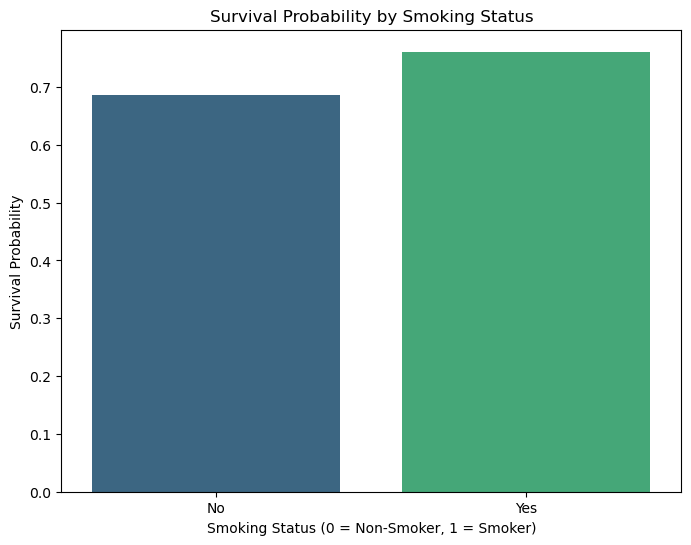

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df1.index, y=df1["prob"], palette="viridis")
plt.xlabel("Smoking Status (0 = Non-Smoker, 1 = Smoker)")
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Smoking Status")
plt.show()

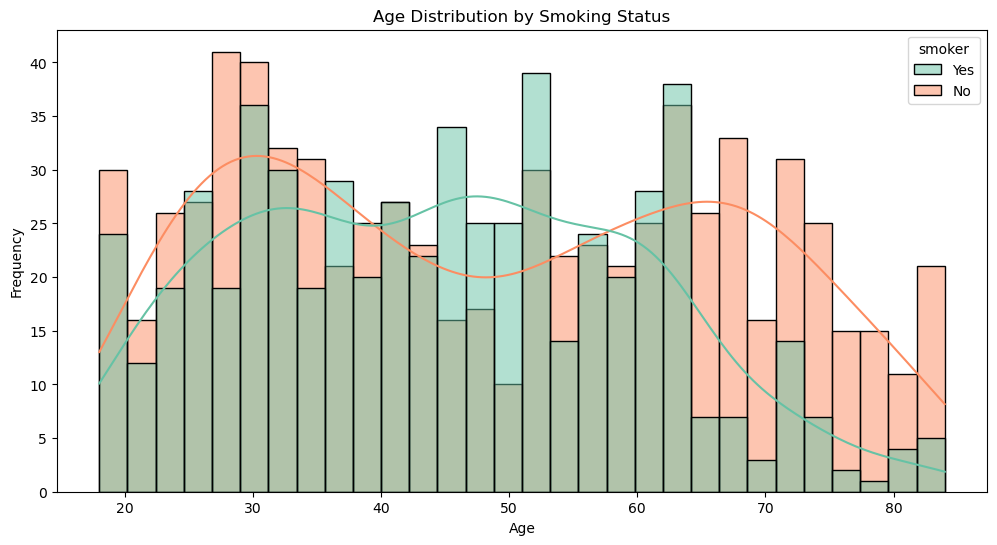

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", hue="smoker", kde= True, bins=30, palette="Set2")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Smoking Status")
plt.show()

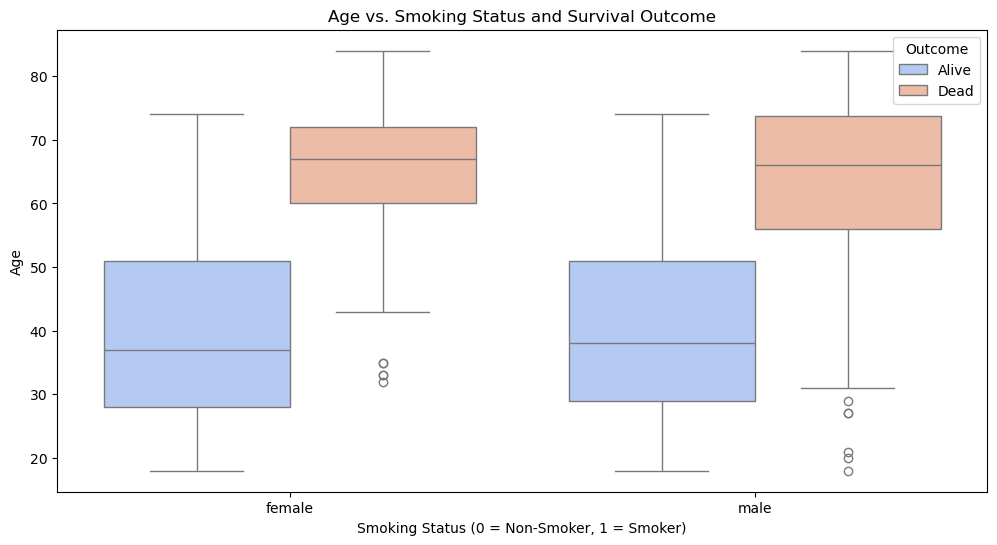

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="gender", y="age", hue="outcome", palette="coolwarm")
plt.xlabel("Smoking Status (0 = Non-Smoker, 1 = Smoker)")
plt.ylabel("Age")
plt.title("Age vs. Smoking Status and Survival Outcome")
plt.legend(title="Outcome", loc="upper right")
plt.show()


# Is smoking really good?

These visualizations gave us better insight into the relationships between smoking and survival probability, while also considering other variables like age and gender. The certain confounding factors, like age, gender, also play a significant role in the observed differences in survival probability between smokers and non-smokers. Hence, my cousin is very very wrong.